# Background

### Data set

[Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization)

### Abstract

Collected in indoor space by observing signal strengths of seven WiFi signals visible on a smartphone. The decision variable is one of the four rooms.

### Data Set Information

Collected to perform experimentation on how wifi signal strengths can be used to determine one of the indoor locations.

### Attribute Information

Each attribute is wifi signal strength observed on smartphone.

### Credits

1. Rajen Bhatt, 'Fuzzy-Rough Approaches for Pattern Classification: Hybrid measures, Mathematical analysis, Feature selection algorithms, Decision tree algorithms, Neural learning, and Applications', Amazon Books 
2. Jayant G Rohra, Boominathan Perumal, Swathi Jamjala Narayanan, Priya Thakur, and Rajen B Bhatt, 'User Localization in an Indoor Environment Using Fuzzy Hybrid of Particle Swarm Optimization & Gravitational Search Algorithm with Neural Networks', in Proceedings of Sixth International Conference on Soft Computing for Problem Solving,2017, pp. 286-295.

# Prepare data

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create variables for the columns so that we can easily switch between different data sets with minimal changes
columns = ['Agent 1', 'Agent 2', 'Agent 3', 'Agent 4', 'Agent 5', 'Agent 6', 'Agent 7', 'Location']
attributes = columns[0:7]
target = columns[7]

# Import data set and create a data frames
dataframe = pd.read_csv('wifi_localization.txt', delim_whitespace=True, header=None, usecols=[*range(0, 8)], names=columns)
data = pd.DataFrame.copy(dataframe)
data_scaled = pd.DataFrame.copy(dataframe)

# Create a scaler object
scaler = MinMaxScaler()

# Normalize data in data_scaled
data_scaled[attributes] = scaler.fit_transform(data_scaled[attributes])

# Convert the array back to a dataframe
data_scaled = pd.DataFrame(data_scaled)

# Present data

Orginal data:


Agent 1  Agent 2  Agent 3  Agent 4  Agent 5  Agent 6  Agent 7  Location
count   2000.0   2000.0   2000.0   2000.0   2000.0   2000.0   2000.0    2000.0
mean     -52.3    -55.6    -55.0    -53.6    -62.6    -81.0    -81.7       2.5
std       11.3      3.4      5.3     11.5      9.1      6.5      6.5       1.1
min      -74.0    -74.0    -73.0    -77.0    -89.0    -97.0    -98.0       1.0
25%      -61.0    -58.0    -58.0    -63.0    -69.0    -86.0    -87.0       1.8
50%      -55.0    -56.0    -55.0    -56.0    -64.0    -82.0    -83.0       2.5
75%      -46.0    -53.0    -51.0    -46.0    -56.0    -77.0    -78.0       3.2
max      -10.0    -45.0    -40.0    -11.0    -36.0    -61.0    -63.0       4.0

Scaled data:


Agent 1  Agent 2  Agent 3  Agent 4  Agent 5  Agent 6  Agent 7  Location
count   2000.0   2000.0   2000.0   2000.0   2000.0   2000.0   2000.0    2000.0
mean       0.3      0.6      0.5      0.4      0.5      0.4      0.5       2.5
std        0.2      0.1      0.2      0.2      0.2      0.2      0.2       1.1
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0       1.0
25%        0.2      0.6      0.5      0.2      0.4      0.3      0.3       1.8
50%        0.3      0.6      0.5      0.3      0.5      0.4      0.4       2.5
75%        0.4      0.7      0.7      0.5      0.6      0.6      0.6       3.2
max        1.0      1.0      1.0      1.0      1.0      1.0      1.0       4.0

Text(0.5, 1.02, 'Normalized data')

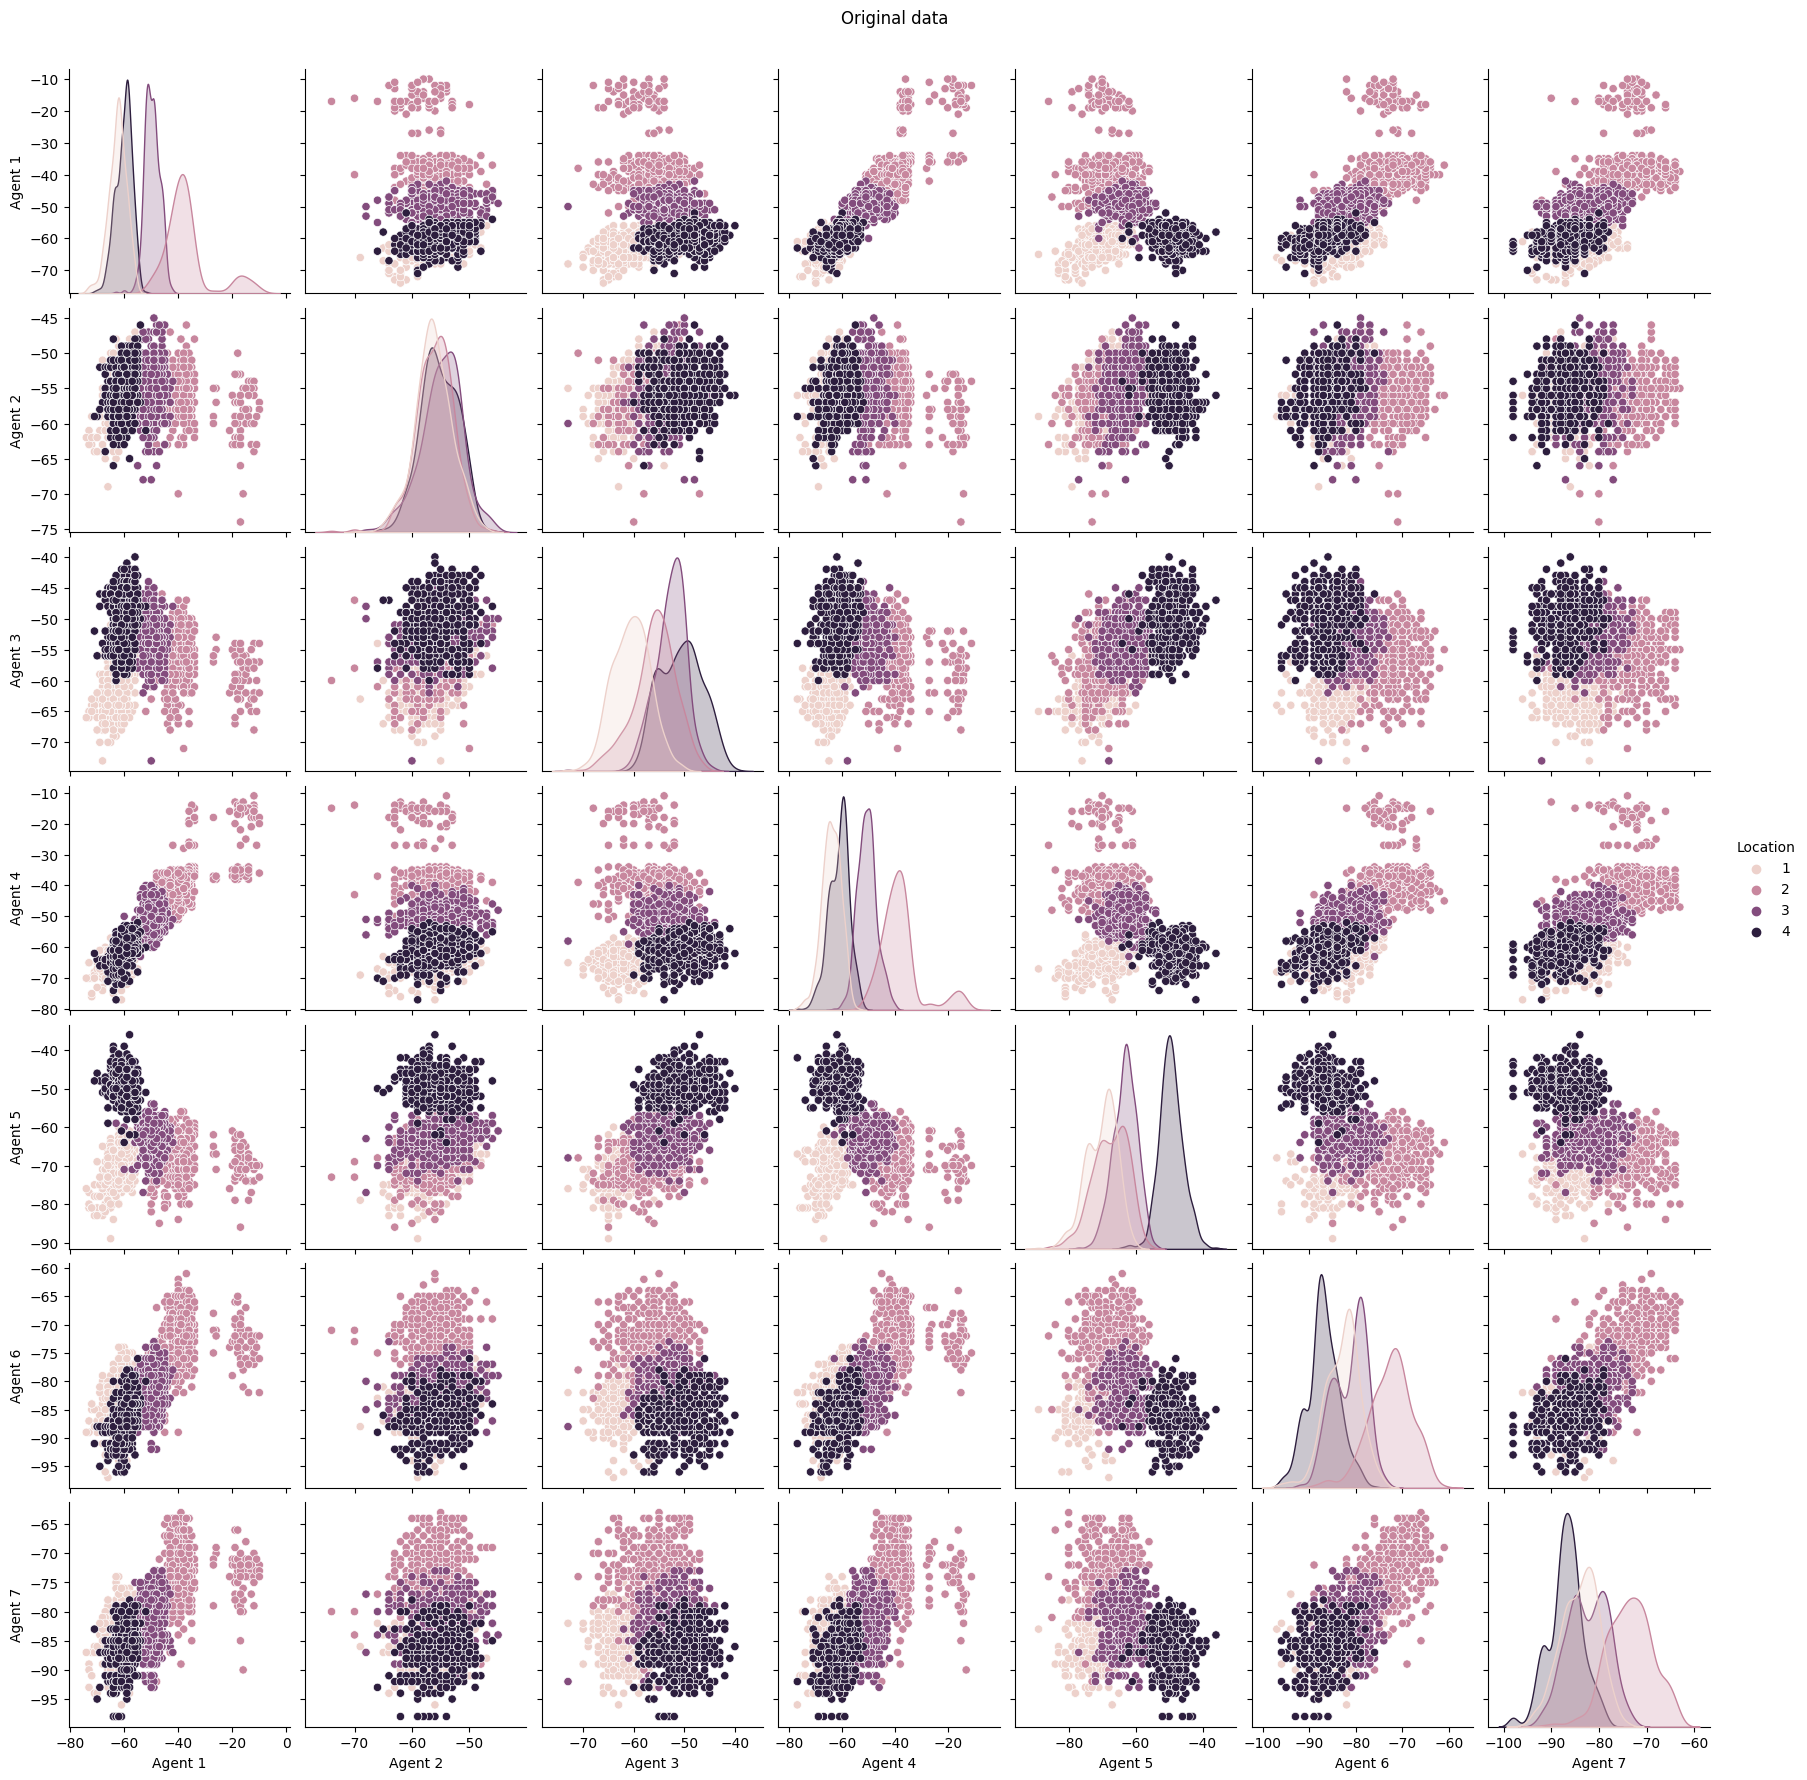

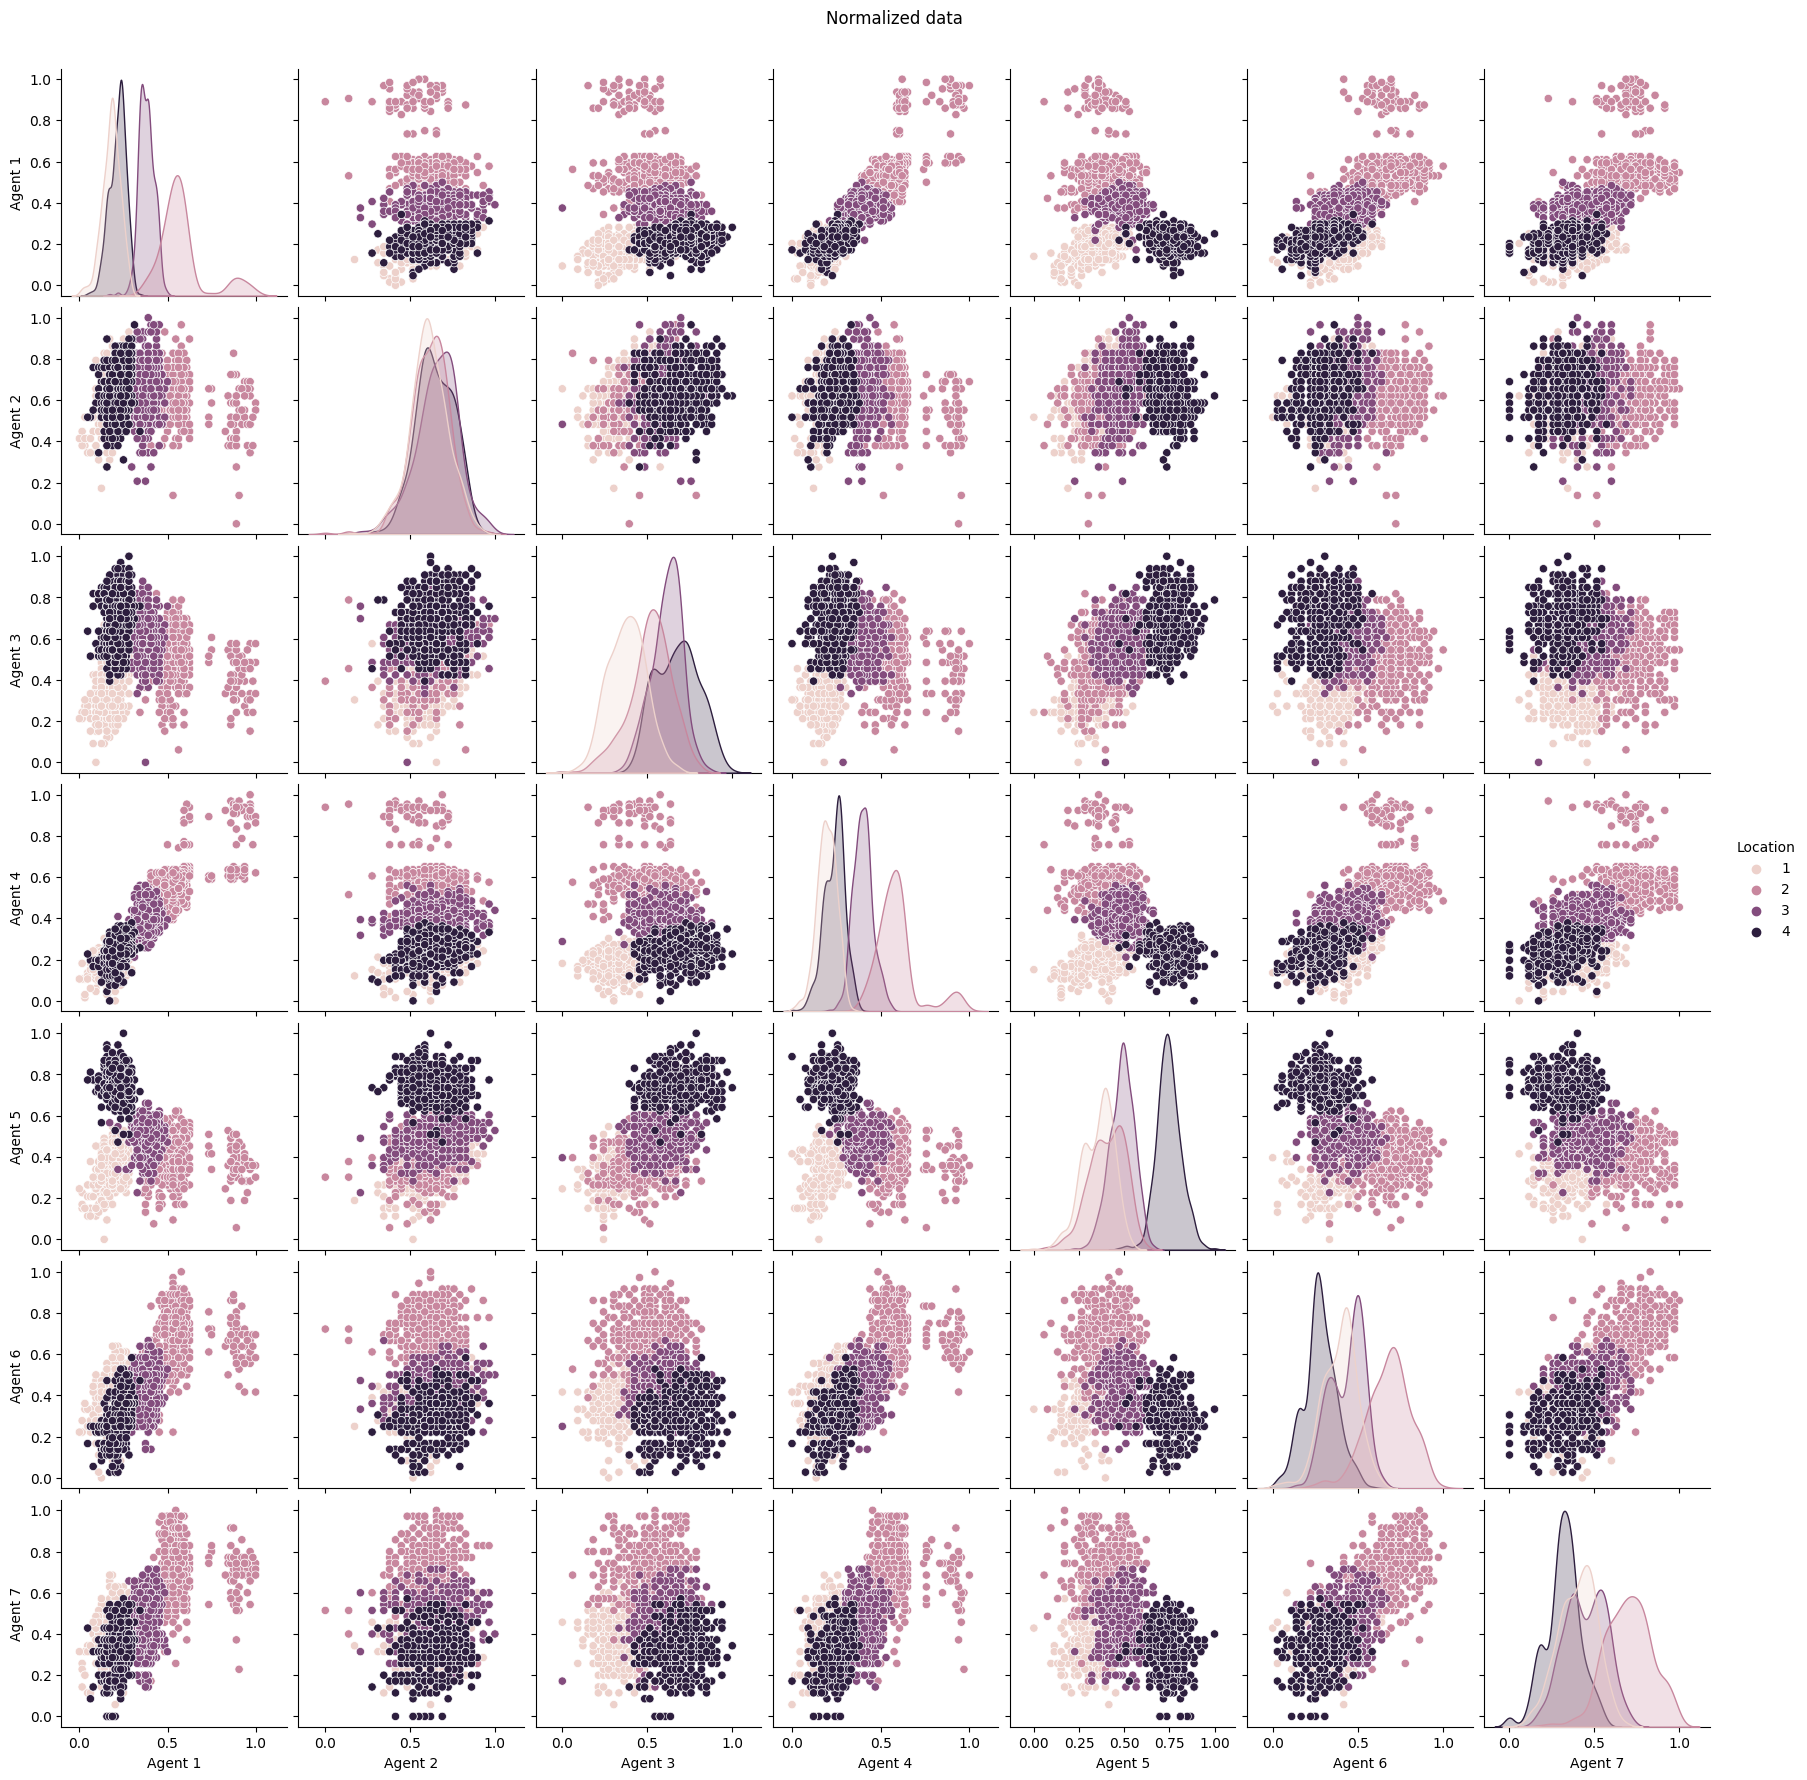

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

print('Orginal data:')
display(round(data.describe(),1))

print('Scaled data:')
display(round(data_scaled.describe(),1))

ax1 = sns.pairplot(data, hue = target)
ax1.fig.suptitle("Original data", y=1.02)
ax2 = sns.pairplot(data_scaled, hue = target)
ax2.fig.suptitle("Normalized data", y=1.02)

# Analyze data

## Single run

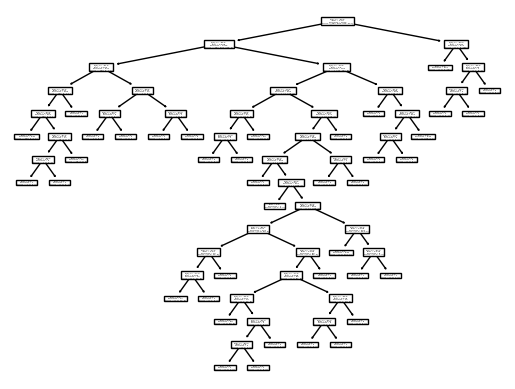


Classification report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       139
           2       0.93      0.95      0.94       105
           3       0.94      0.94      0.94       127
           4       1.00      0.98      0.99       129

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500


Confusion matrix:
 [[138   0   1   0]
 [  0 100   5   0]
 [  0   7 120   0]
 [  1   0   1 127]]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Split data into training and test sets
x = data.drop(target, axis = 1)
y = data[target]
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

# Train the decision tree model
model = DecisionTreeClassifier(random_state=None)
model.fit(x_training_data, y_training_data)

# Predict the test set results
predictions = model.predict(x_test_data)

# Generate a decision tree
tree.plot_tree(model)
plt.show()

# Print the classification report
print('\nClassification report:\n', classification_report(y_test_data, predictions))

# Print the Confusion matrix
print('\nConfusion matrix:\n', confusion_matrix(y_test_data, predictions))
#pd.crosstab(y_test_data, predictions, rownames=['Actual'], colnames=['Predicted'])

## Single run - Normalized

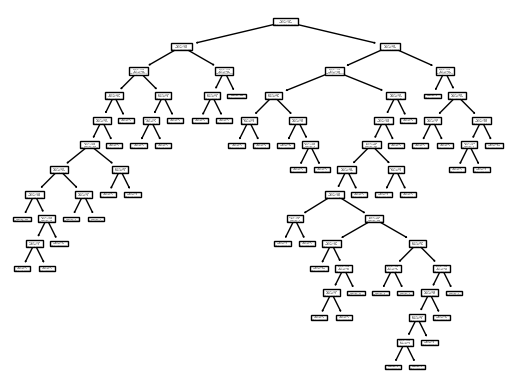


Classification report:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       126
           2       0.98      0.93      0.96       116
           3       0.92      0.97      0.94       126
           4       0.98      0.98      0.98       132

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500


Confusion matrix:
 [[125   0   0   1]
 [  0 108   8   0]
 [  1   2 122   1]
 [  0   0   3 129]]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Split data into training and test sets
x = data.drop(target, axis = 1)
y = data[target]
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

# Train the decision tree model
model = DecisionTreeClassifier(random_state=None)
model.fit(x_training_data, y_training_data)

# Predict the test set results
predictions = model.predict(x_test_data)

# Generate a decision tree
tree.plot_tree(model)
plt.show()

# Print the classification report
print('\nClassification report:\n', classification_report(y_test_data, predictions))

# Print the Confusion matrix
print('\nConfusion matrix:\n', confusion_matrix(y_test_data, predictions))
#pd.crosstab(y_test_data, predictions, rownames=['Actual'], colnames=['Predicted'])

## 100 runs - 75/25 split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Create arrays to store the results
accuracy_log = []
confusion_matrix_log = []

# Do 100 runs
for i in range(100):
    # Split data into training and test sets
    x = data.drop(target, axis = 1)
    y = data[target]
    x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

    # Train the decision tree model
    model = DecisionTreeClassifier(random_state=None)
    model.fit(x_training_data, y_training_data)

    # Predict the test set results
    predictions = model.predict(x_test_data)
    
    # Save the confusion matrix for each run
    cm = confusion_matrix(y_test_data, predictions)
    confusion_matrix_log.insert(i, cm)

    # Calculate and save the accuracy for each run
    accuracy = (cm[0][0] + cm[1][1]) / sum(sum(row) for row in cm)
    accuracy_log.insert(i, accuracy)

# Get index of the highest and second lowest accuracy
max_accuracy_index = accuracy_log.index(max(accuracy_log))
min_accuracy_index = accuracy_log.index(min(accuracy_log))

# Print the average accuracy
print('Average accuracy:\n', sum(accuracy_log)/len(accuracy_log),'\n')

# Print the highest accuracy and the corresponding confusion matrix for that run
print('---Best run---\nAccuracy:\n', accuracy_log[max_accuracy_index],'\n')
print('Confusion matrix:\n', confusion_matrix_log[max_accuracy_index],'\n\n')

# Print the lowest accuracy and the corresponding confusion matrix for that run
print('---Worst run---\nAccuracy:\n', accuracy_log[min_accuracy_index],'\n')
print('Confusion matrix:\n', confusion_matrix_log[min_accuracy_index],'\n\n')

Average accuracy:
 0.4852000000000003 

---Best run---
Accuracy:
 0.528 

Confusion matrix:
 [[125   0   1   0]
 [  0 139   8   0]
 [  1   5 108   0]
 [  1   0   1 111]] 


---Worst run---
Accuracy:
 0.448 

Confusion matrix:
 [[102   0   0   2]
 [  0 122   5   0]
 [  1   4 125   1]
 [  1   0   0 137]] 




## 100 runs - Normalized, 75/25 split

Running the model with normalized data didn't really improve our accuracy. I could only think of one reason for this and it's that all of the attributes are measured with the same scale and unit so there aren't really a lot of variation between the different attribue values. If we were measuring for example age and income where the spread would be larger we probably would have seen a big improvement.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Create arrays to store the results
accuracy_log = []
confusion_matrix_log = []


# Do 100 runs
for i in range(100):
    # Split data into training and test sets
    x = data_scaled.drop(target, axis = 1)
    y = data_scaled[target]
    x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

    # Train the decision tree model
    model = DecisionTreeClassifier(random_state=None)
    model.fit(x_training_data, y_training_data)

    # Predict the test set results
    predictions = model.predict(x_test_data)
    
    # Save the confusion matrix for each run
    cm = confusion_matrix(y_test_data, predictions)
    confusion_matrix_log.insert(i, cm)

    # Calculate and save the accuracy for each run
    accuracy = (cm[0][0] + cm[1][1]) / sum(sum(row) for row in cm)
    accuracy_log.insert(i, accuracy)


# Get index of the highest and second lowest accuracy
max_accuracy_index = accuracy_log.index(max(accuracy_log))
min_accuracy_index = accuracy_log.index(min(accuracy_log))

# Print the average accuracy
print('Average accuracy:\n', sum(accuracy_log)/len(accuracy_log),'\n')

# Print the highest accuracy and the corresponding confusion matrix for that run
print('---Best run---\nAccuracy:\n', accuracy_log[max_accuracy_index],'\n')
print('Confusion matrix:\n', confusion_matrix_log[max_accuracy_index],'\n\n')

# Print the lowest accuracy and the corresponding confusion matrix for that run
print('---Worst run---\nAccuracy:\n', accuracy_log[min_accuracy_index],'\n')
print('Confusion matrix:\n', confusion_matrix_log[min_accuracy_index],'\n\n')

Average accuracy:
 0.9698399999999999 

---Best run---
Accuracy:
 0.986 

Confusion matrix:
 [[118   0   0   1]
 [  0 122   2   0]
 [  1   3 116   0]
 [  0   0   0 137]] 


---Worst run---
Accuracy:
 0.95 

Confusion matrix:
 [[132   0   1   2]
 [  0 123   7   0]
 [  2  10 106   0]
 [  2   0   1 114]] 




## 100 runs - 5/95 split

Making minor changes in the split didn't affect the results by a lot so let's take it to the extreme and give the model a very small cut for training. I believe this might, in part, be due to to the large data set compared to the other recommended options.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Create arrays to store the results
accuracy_log = []
confusion_matrix_log = []


# Do 100 runs
for i in range(100):
    # Split data into training and test sets
    x = data.drop(target, axis = 1)
    y = data[target]
    x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.95)

    # Train the decision tree model
    model = DecisionTreeClassifier(random_state=None)
    model.fit(x_training_data, y_training_data)

    # Predict the test set results
    predictions = model.predict(x_test_data)
    
    # Save the confusion matrix for each run
    cm = confusion_matrix(y_test_data, predictions)
    confusion_matrix_log.insert(i, cm)

    # Calculate and save the accuracy for each run
    accuracy = (cm[0][0] + cm[1][1]) / sum(sum(row) for row in cm)
    accuracy_log.insert(i, accuracy)


# Get index of the highest and second lowest accuracy
max_accuracy_index = accuracy_log.index(max(accuracy_log))
min_accuracy_index = accuracy_log.index(min(accuracy_log))

# Print the average accuracy
print('Average accuracy:\n', sum(accuracy_log)/len(accuracy_log),'\n')

# Print the highest accuracy and the corresponding confusion matrix for that run
print('---Best run---\nAccuracy:\n', accuracy_log[max_accuracy_index],'\n')
print('Confusion matrix:\n', confusion_matrix_log[max_accuracy_index],'\n\n')

# Print the lowest accuracy and the corresponding confusion matrix for that run
print('---Worst run---\nAccuracy:\n', accuracy_log[min_accuracy_index],'\n')
print('Confusion matrix:\n', confusion_matrix_log[min_accuracy_index],'\n\n')

Average accuracy:
 0.9358894736842103 

---Best run---
Accuracy:
 0.9631578947368421 

Confusion matrix:
 [[474   0   1   0]
 [  0 439  34   2]
 [  4  14 449   7]
 [  8   0   0 468]] 


---Worst run---
Accuracy:
 0.8852631578947369 

Confusion matrix:
 [[469   0   0   0]
 [  0 429  45   0]
 [ 27 134 319   4]
 [  8   0   0 465]] 




## 100 runs - Normalized, 5/95 split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Create arrays to store the results
accuracy_log = []
confusion_matrix_log = []


# Do 100 runs
for i in range(100):
    # Split data into training and test sets
    x = data_scaled.drop(target, axis = 1)
    y = data_scaled[target]
    x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.95)

    # Train the decision tree model
    model = DecisionTreeClassifier(random_state=None)
    model.fit(x_training_data, y_training_data)

    # Predict the test set results
    predictions = model.predict(x_test_data)
    
    # Save the confusion matrix for each run
    cm = confusion_matrix(y_test_data, predictions)
    confusion_matrix_log.insert(i, cm)

    # Calculate and save the accuracy for each run
    accuracy = (cm[0][0] + cm[1][1]) / sum(sum(row) for row in cm)
    accuracy_log.insert(i, accuracy)


# Get index of the highest and second lowest accuracy
max_accuracy_index = accuracy_log.index(max(accuracy_log))
min_accuracy_index = accuracy_log.index(min(accuracy_log))

# Print the average accuracy
print('Average accuracy:\n', sum(accuracy_log)/len(accuracy_log),'\n')

# Print the highest accuracy and the corresponding confusion matrix for that run
print('---Best run---\nAccuracy:\n', accuracy_log[max_accuracy_index],'\n')
print('Confusion matrix:\n', confusion_matrix_log[max_accuracy_index],'\n\n')

# Print the lowest accuracy and the corresponding confusion matrix for that run
print('---Worst run---\nAccuracy:\n', accuracy_log[min_accuracy_index],'\n')
print('Confusion matrix:\n', confusion_matrix_log[min_accuracy_index],'\n\n')

Average accuracy:
 0.9367052631578947 

---Best run---
Accuracy:
 0.9647368421052631 

Confusion matrix:
 [[475   0   0   0]
 [  0 441  31   0]
 [ 13  13 442   2]
 [  5   0   3 475]] 


---Worst run---
Accuracy:
 0.868421052631579 

Confusion matrix:
 [[454   0   9  11]
 [  0 400  75   0]
 [  2  76 389   9]
 [  1  38  29 407]] 


